# Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.loadtxt('data.dat')
X=X.T

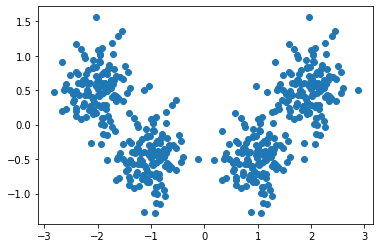

In [4]:
plt.scatter(X[:,0],X[:,1])

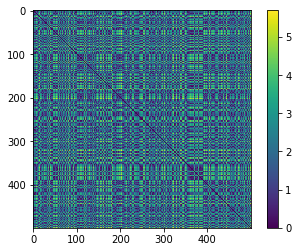

In [114]:
distance_matrix = np.linalg.norm(X - X[:,None],axis=-1)
plt.imshow(distance_matrix)
plt.colorbar()

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.
C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


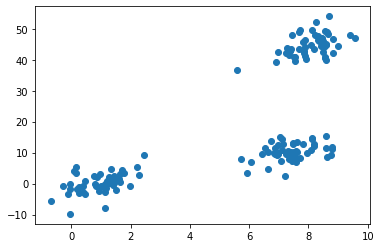

In [148]:
samples1 = np.random.multivariate_normal([1,1], [[0.9, 10],[0.5, 0.9]], 50)
samples2 = np.random.multivariate_normal([7.5,10], [[0.9, 10],[0.5, 0.9]], 50)
samples3 = np.random.multivariate_normal([8,45], [[0.9, 10],[0.5, 0.9]], 50)
samples= np.concatenate((samples1,samples2,samples3))
plt.scatter(samples[:,0],samples[:,1])


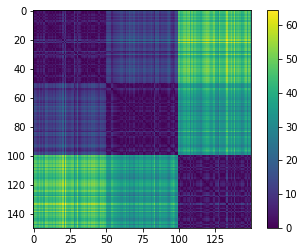

In [149]:
X = samples
distance_matrix = np.linalg.norm(X - X[:,None],axis=-1)
plt.imshow(distance_matrix)
plt.colorbar()

# K-Means - Batch

In [454]:
def initialize_centroids(X, M):
    random_idx = np.arange( X.shape[0] )
    np.random.shuffle(random_idx)
    centroids = X[random_idx[:M], : ]
    return centroids

def distances(X,centroids):
    return np.array([np.linalg.norm(X-centroid, axis=-1) for centroid in centroids])
def closest_cluster(distances):
    return np.argmin(distances,axis=-2)

def move_centroids(old_centroids, X ,closest_cluster):
    new_centroids = old_centroids.copy()
    for k in range(old_centroids.shape[0]):
        new_centroids[k] = X[closest_cluster == k].mean(axis=-2)         #Update Centroids
    return new_centroids

def energy(closest_cluster_, centroids, X):
    E=0
    for i in range(centroids.shape[0]):
        E+=(np.linalg.norm(X[closest_cluster_ == i] - centroids[i])**2).sum()
    return E/X.shape[0]

def fit_kmeans(X, M, t_max = 5):
    centroids_cache = []
    closest_cluster_cache = []
    energy_cache = []
    centroids = initialize_centroids(X, M)
    distance = distances(X,centroids)
    closest_cluster_ = closest_cluster(distance)
    centroids_cache.append(centroids.copy())
    closest_cluster_cache.append(closest_cluster_.copy())

    for i in range(t_max):
            distance = distances(X,centroids)
            closest_cluster_ = closest_cluster(distance)
            centroids = move_centroids(centroids, X ,closest_cluster_)
            centroids_cache.append(centroids.copy())
            closest_cluster_cache.append(closest_cluster_.copy())
            energy_cache.append(energy(closest_cluster_, centroids, X))
    return centroids_cache, closest_cluster_cache, energy_cache

In [455]:
centroids_cache, closest_cluster_cache, Energy_cache = fit_kmeans(X, 3, t_max = 5)

In [456]:
col = ['r', 'b', 'g', 'y', 'orange', 'k', 'cyan', 'gray', 'm']
def col_(C_C):
    C=[]
    for i in C_C:
        if i == 0:
            C.append('r')
        if i == 1:
            C.append('b')
        if i == 2:
            C.append('g')
        if i == 3:
            C.append('y')
        if i == 4:
            C.append('orange')
        if i == 5:
            C.append('k')
        if i == 6:
            C.append('cyan')
        if i == 7:
            C.append('gray')
        if i == 8:
            C.append('m')
    return C
def color(C):
    col = ['r', 'b', 'g', 'y', 'orange', 'k', 'cyan', 'gray', 'm']
    return col[0:C.shape[0]]       

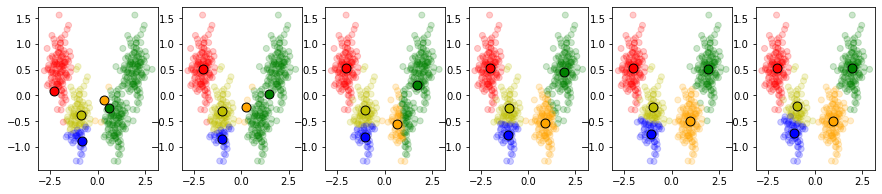

In [457]:
centroids_cache, closest_cluster_cache, Energy_cache = fit_kmeans(X, 5, t_max = 5)
fig, axes = plt.subplots(1,6, figsize=(15,3))
for idx,ax in enumerate(axes.flat):
    ax.scatter(X[:,0],X[:,1], c=col_(closest_cluster_cache[idx]) ,alpha=0.2, cmap='viridis')
    for i in range(centroids_cache[0].shape[0]):
        ax.scatter(centroids_cache[idx][i][0] ,centroids_cache[idx][i][1] , edgecolors='k', s=80, c=col[i])

Text(0.5, 1.0, 'Always decreasing Function')

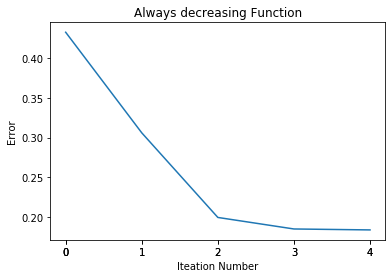

In [458]:
plt.plot(Energy_cache)
_=plt.xlabel('Iteation Number')
_=plt.ylabel('Error')

xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))
_=plt.xticks(xint)
plt.title('Always decreasing Function')

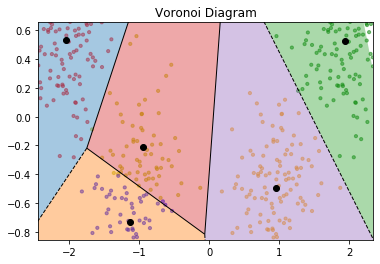

In [459]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = centroids_cache[-1]
plt.show()
vor = Voronoi(points)
voronoi_plot_2d(vor, show_vertices = False)
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)
regions, vertices = voronoi_finite_polygons_2d(vor)
# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
_=plt.title('Voronoi Diagram')
plt.scatter(X[:,0],X[:,1], c=col_(closest_cluster_cache[-1]) ,alpha=0.5, cmap='viridis', s=10)
plt.plot(points[:,0], points[:,1], 'ko')

# K-Means - Online

In [2709]:
def closest_cluster(datapoint,centroids):
    D= np.array([np.linalg.norm(datapoint-centroid, axis=-1) for centroid in centroids])
    return np.argmin(D)
def initialize_centroids(X, M):
    mean = X.mean(-2)
    centroids = np.zeros((M,X.shape[1]))
    for i in range(M):
        centroids[i] = X.mean(-2)+np.random.uniform(-1,1)*X.std(-2)*0.5
    return centroids   
def move_prototype(centroids, closest_cluster, datapoint, eta):
    centroids[closest_cluster] = centroids[closest_cluster] + (eta*(datapoint - centroids[closest_cluster]))
def closest_cluster_final(X,centroids):
    D = np.array([np.linalg.norm(X-centroid, axis=-1) for centroid in centroids])
    return np.argmin(D,axis=-2)
def energy(closest_cluster_, centroids, X):
    E=0
    for i in range(centroids.shape[0]):
        E+=(np.linalg.norm(X[closest_cluster_ == i] - centroids[i])**2).sum()
    return E/X.shape[0]

In [2710]:
def fit_online_kmeans(X, M, eta, tau,t_max = X.shape[0]):
    centroids_cache = []
    closest_cluster_cache = []
    energy_cache = []
    centroids = initialize_centroids(X, M)
    E = []
    centroids_cache.append(centroids.copy())


    for i in range(t_max):
        
            if i < t_max/4:
                learning_rate = eta
            else:
                learning_rate = tau*eta*learning_rate
                
            closest_cluster_ = closest_cluster(X[i],centroids)
            move_prototype(centroids, closest_cluster_, X[i], learning_rate) 
            centroids_cache.append(centroids.copy())
            E.append((energy(closest_cluster_final(X,centroids), centroids, X)).copy())
    closest_cluster_final_ = closest_cluster_final(X,centroids)


    return centroids_cache,closest_cluster_final_, E

In [2711]:
cache, cluster,E = fit_online_kmeans(X, 4, 0.2, 0.5,t_max = X.shape[0])

Text(0, 0.5, 'Energy')

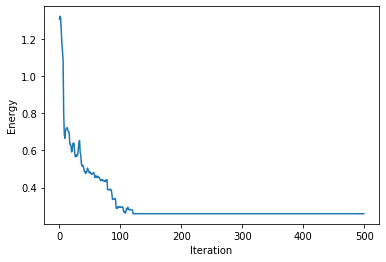

In [2712]:
plt.plot(E)
plt.xlabel('Iteration')
plt.ylabel('Energy')

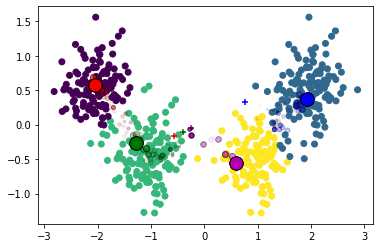

In [2713]:
plt.scatter(X[:,0],X[:,1], c=cluster)

plt.scatter(cache[0][0,0],cache[0][0,1], c='r', edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][1,0],cache[0][1,1], c='b', edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][2,0],cache[0][2,1],c='g',edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][3,0],cache[0][3,1],c='m', edgecolors='k', marker='+',s=30)

for i in range(len(cache)):
    plt.scatter(cache[i][0,0],cache[i][0,1], c='r',s=i*0.35, alpha=0.08,edgecolors='k')
    plt.scatter(cache[i][1,0],cache[i][1,1], c='b',s=i*0.35, alpha=0.08,edgecolors='k')
    plt.scatter(cache[i][2,0],cache[i][2,1],c='g',s=i*0.35, alpha=0.08,edgecolors='k')
    plt.scatter(cache[i][3,0],cache[i][3,1],c='m',s=i*0.35, alpha=0.08,edgecolors='k')
    

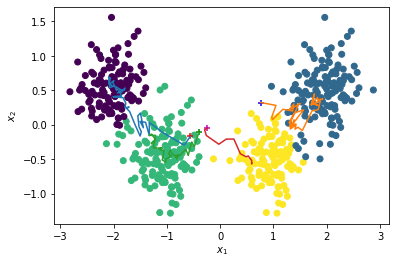

In [2714]:
cache = np.array(cache)
plt.scatter(X[:,0],X[:,1], c=cluster)
plt.scatter(cache[0][0,0],cache[0][0,1], c='r', edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][1,0],cache[0][1,1], c='b', edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][2,0],cache[0][2,1],c='g',edgecolors='k', marker='+',s=30)
plt.scatter(cache[0][3,0],cache[0][3,1],c='m', edgecolors='k', marker='+',s=30)
_=plt.plot(cache[:,0,:][:,0],cache[:,0,:][:,1] )
_=plt.plot(cache[:,1,:][:,0],cache[:,1,:][:,1])
_=plt.plot(cache[:,2,:][:,0],cache[:,2,:][:,1])
_=plt.plot(cache[:,3,:][:,0],cache[:,3,:][:,1])
_=plt.xlabel('$x_1$')
_=plt.ylabel('$x_2$')

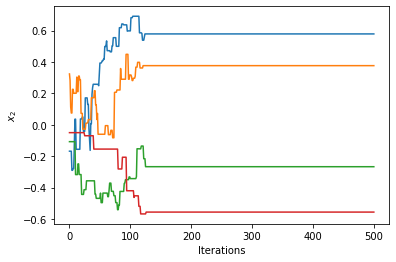

In [2715]:
for i in range(4):
    plt.plot(cache[:,i,1])
_=plt.xlabel('Iterations')
_=plt.ylabel('$x_2$')

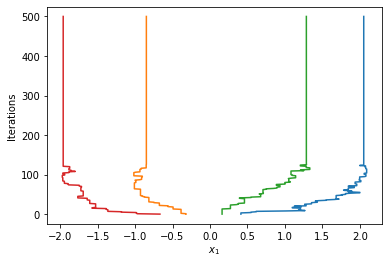

In [2708]:
from matplotlib import pyplot, transforms
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(90)
for i in range(4):
    plt.plot(cache[:,i,0], transform= rot + base)
_=plt.xlabel('$x_1$')
_=plt.ylabel('Iterations')

# Soft K-means Clustering

## Fixed Beta

In [5]:
def initialize_centroids(X, M, seed=0):
    np.random.seed(seed)
    mean = X.mean(-2)
    centroids = np.zeros((M,X.shape[1]))
    for i in range(M):
        centroids[i] = X.mean(-2)+np.random.uniform(-1,1)*X.std(-2)*0.1
    return centroids   

In [6]:
def soft_kmeans_fixed_beta(X,M,beta,conv_tol):
    centroids = initialize_centroids(X, M, seed=0)
    Centroid_cache = []
    Centroid_cache.append(centroids)
    cache = centroids.copy()*5
    asgn_prob = np.zeros((M,X.shape[0]))
    y=0
    
    while ((np.linalg.norm((centroids - cache), axis=-1) > [conv_tol]*M).sum() >= 2):
            
            cache = centroids.copy()
            for i in range(M):
                asgn_prob[i] = (np.exp((-beta/2)*np.linalg.norm((X - centroids[i]), axis=-1)**2)) / ((np.exp((-beta/2)*np.linalg.norm((X - centroids[:,None]), axis=-1)**2)).sum(-2))
            for i in range(M):
                centroids[i] = (np.sum((asgn_prob[i].reshape(X.shape[0],1) * X), axis=-2)) / (asgn_prob[i].sum())
            Centroid_cache.append(centroids.copy())
            y+=1
    print("Number of Iterations before convergence:::",y)
    
    return Centroid_cache

In [7]:
Centroid_cache = soft_kmeans_fixed_beta(X,14, 1.5,0.001)

Number of Iterations before convergence::: 63


In [8]:
def beta_effect(X,M, beta, conv_tol):
    Centroid_cache = soft_kmeans_fixed_beta(X,M, beta, conv_tol)
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(initialize_centroids(X, 12)[:,0],initialize_centroids(X, 12)[:,1], alpha=0.3)
    plt.scatter(Centroid_cache[-1][:,0],Centroid_cache[-1][:,1], c='r')    

Number of Iterations before convergence::: 46


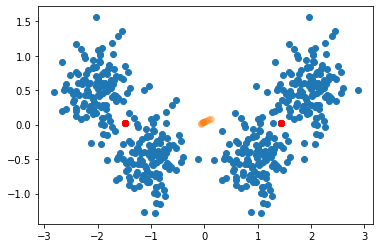

In [9]:
beta_effect(X,12,1.2,0.0001)

In [10]:
B = [0.2 + 0.8*i for i in range(25)]

Number of Iterations before convergence::: 11
Number of Iterations before convergence::: 37
Number of Iterations before convergence::: 106
Number of Iterations before convergence::: 82
Number of Iterations before convergence::: 42
Number of Iterations before convergence::: 30
Number of Iterations before convergence::: 27
Number of Iterations before convergence::: 27
Number of Iterations before convergence::: 32
Number of Iterations before convergence::: 48
Number of Iterations before convergence::: 110
Number of Iterations before convergence::: 122
Number of Iterations before convergence::: 81
Number of Iterations before convergence::: 123
Number of Iterations before convergence::: 106
Number of Iterations before convergence::: 70
Number of Iterations before convergence::: 200
Number of Iterations before convergence::: 113
Number of Iterations before convergence::: 86
Number of Iterations before convergence::: 71
Number of Iterations before convergence::: 62
Number of Iterations before

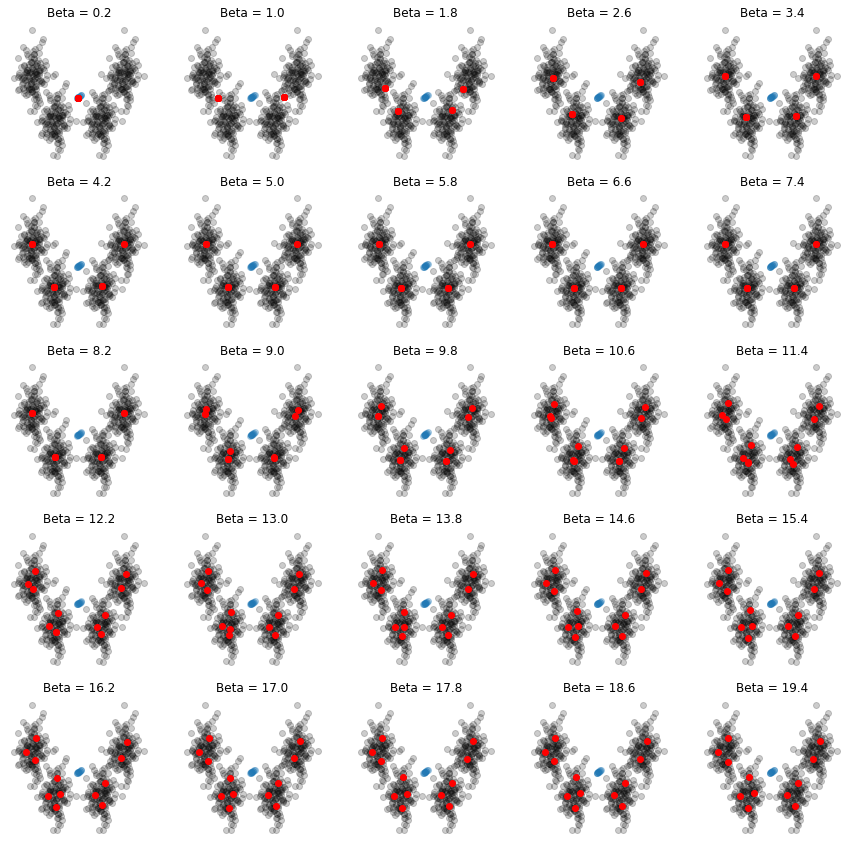

In [12]:
fig, axes = plt.subplots(5,5, figsize=(15,15))
for idx,ax in enumerate(axes.flat):
    Centroid_cache = soft_kmeans_fixed_beta(X,12, B[idx], 0.0001)
    ax.scatter(X[:,0],X[:,1], c='k', alpha=0.2)
    ax.scatter(initialize_centroids(X, 12)[:,0],initialize_centroids(X, 12)[:,1], alpha=0.3)
    ax.scatter(Centroid_cache[-1][:,0],Centroid_cache[-1][:,1], c='r')  
    ax.title.set_text('Beta = {:.1f}'.format(B[idx]))
    ax.axis('off')

## With Annealing

In [444]:
def soft_kmeans_annealed_beta(X,M,beta,beta_final,conv_tol):
    centroids = initialize_centroids(X, M, seed=0)
    Centroid_cache = []
    Centroid_cache.append(centroids.copy())
    cache = centroids.copy()*5
    asgn_prob = np.zeros((M,X.shape[0]))
    beta_track = []
    
    while beta<beta_final:
        cache = centroids.copy()*5
        while ((np.linalg.norm((centroids - cache), axis=-1) > [conv_tol]*M).sum() >= 2):
                cache = centroids.copy()
                for i in range(M):
                    asgn_prob[i] = (np.exp((-beta/2)*np.linalg.norm((X - centroids[i]), axis=-1)**2)) / ((np.exp((-beta/2)*np.linalg.norm((X - centroids[:,None]), axis=-1)**2)).sum(-2))
                for i in range(M):
                    centroids[i] = (np.sum((asgn_prob[i].reshape(X.shape[0],1) * X), axis=-2)) / (asgn_prob[i].sum())
                Centroid_cache.append(centroids.copy())
                beta_track.append(beta)
        beta = 1.1 * beta
    return Centroid_cache,beta_track

In [445]:
C,beta_track = soft_kmeans_annealed_beta(X,M=12, beta = 0.2,beta_final=2500, conv_tol=0.001)

In [446]:
C,beta_track = soft_kmeans_annealed_beta(X,M=12, beta = 0.2,beta_final=2500, conv_tol=0.001)
CC = np.array(C)

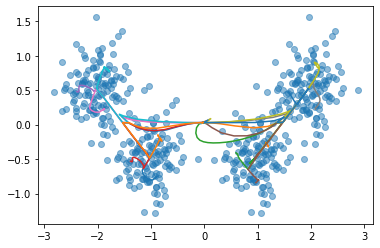

In [447]:
plt.scatter(X[:,0],X[:,1], alpha=0.5)
for i in range(12):
    plt.plot(CC[:,i,:][:,0],CC[:,i,:][:,1] )

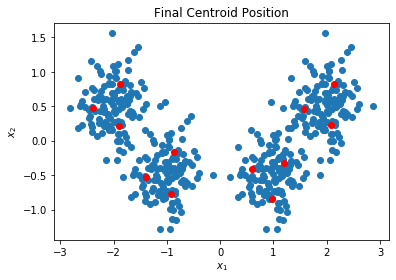

In [448]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(C[-1][:,0],C[-1][:,1], c='r')
_=plt.title('Final Centroid Position')
_=plt.xlabel('$x_1$')
_=plt.ylabel('$x_2$')

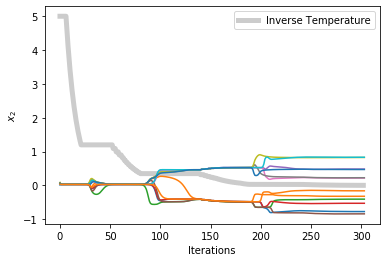

In [449]:
plt.plot(1/np.array(beta_track), c='k', lw=5, alpha=0.2, label='Inverse Temperature')
for i in range(12):
    plt.plot(CC[:,i,1])
_=plt.xlabel('Iterations')
_=plt.ylabel('$x_2$')
_=plt.legend()

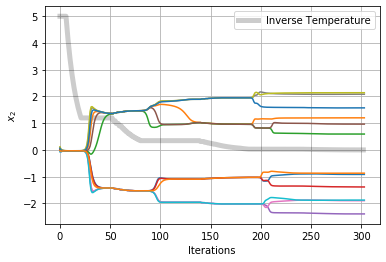

In [450]:
plt.plot(1/np.array(beta_track), c='k', lw=5, alpha=0.2, label='Inverse Temperature')
for i in range(12):
    plt.plot(CC[:,i,0])
_=plt.xlabel('Iterations')
_=plt.ylabel('$x_2$')
plt.grid()
_=plt.legend()

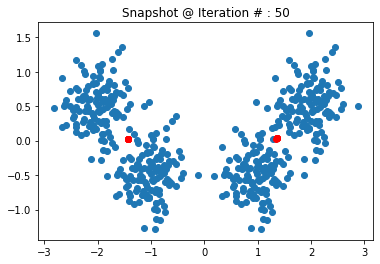

In [451]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(C[50][:,0],C[50][:,1], c='r')
_=plt.title('Snapshot @ Iteration # : 50')

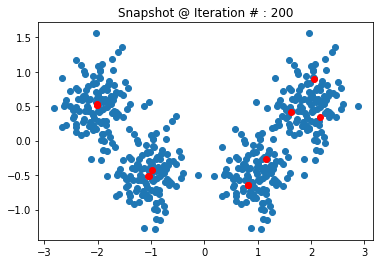

In [452]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(C[200][:,0],C[200][:,1], c='r')
_=plt.title('Snapshot @ Iteration # : 200')